# Uczenie ze wzmocnieniem

In [8]:
! pip install gym==0.26.2

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import gym
import time

env = gym.make("CartPole-v1", render_mode="human")
obs, info = env.reset()

start = time.time()
steps = 0
episodes = 0

while steps < 2000:
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    time.sleep(0.02)  # umożliwia płynne renderowanie na Windowsie
    steps += 1

    if done:
        obs, info = env.reset()
        episodes += 1

end = time.time()
print("FPS:", steps / (end - start))
print("Epizodów:", episodes)


C:\Users\Dawid\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


FPS: 39.34898474148247
Epizodów: 85


## Implementacja Q-learningu na FrozenLake-v1

In [3]:
import numpy as np
import gym

env = gym.make("FrozenLake-v1", is_slippery=False)
n_states = env.observation_space.n
n_actions = env.action_space.n

Q = np.zeros((n_states, n_actions))

epsilon = 0.1
alpha = 0.1
gamma = 0.99
episodes = 1000

rewards = []

for episode in range(episodes):
    state, info = env.reset()
    done = False
    total_reward = 0
    while not done:
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state])

        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        Q[state, action] = Q[state, action] + alpha * (
            reward + gamma * np.max(Q[next_state]) - Q[state, action]
        )
        state = next_state
        total_reward += reward

    rewards.append(total_reward)

C:\Users\Dawid\anaconda3\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


## Ewaluacja

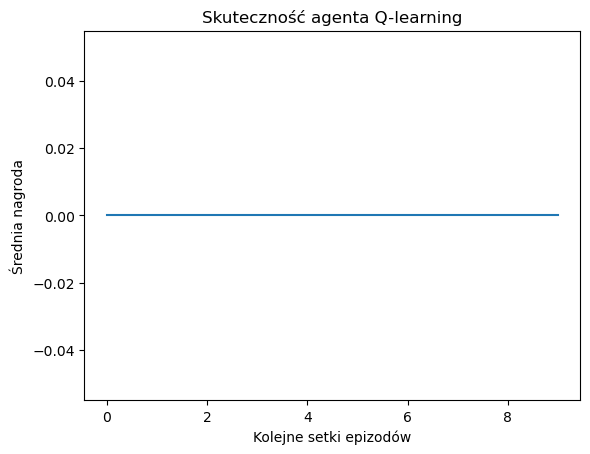

In [5]:
import matplotlib.pyplot as plt

avg_rewards = [np.mean(rewards[i:i+100]) for i in range(0, episodes, 100)]
plt.plot(avg_rewards)
plt.xlabel("Kolejne setki epizodów")
plt.ylabel("Średnia nagroda")
plt.title("Skuteczność agenta Q-learning")
plt.show()

## Frozen Lake - v1

In [3]:
import gym

env = gym.make("FrozenLake-v1", is_slippery=False)
state, info = env.reset()

done = False
while not done:
    print("Stan:", state)

    action = env.action_space.sample()  # losowa akcja (0=lewo, 1=dół, 2=prawo, 3=góra)
    next_state, reward, terminated, truncated, info = env.step(action)

    print(" -> akcja:", action)
    print(" -> nowy stan:", next_state)
    print(" -> nagroda:", reward)
    print(" -> koniec?", terminated or truncated)
    print("-" * 20)

    done = terminated or truncated
    state = next_state


Stan: 0
 -> akcja: 2
 -> nowy stan: 1
 -> nagroda: 0.0
 -> koniec? False
--------------------
Stan: 1
 -> akcja: 2
 -> nowy stan: 2
 -> nagroda: 0.0
 -> koniec? False
--------------------
Stan: 2
 -> akcja: 2
 -> nowy stan: 3
 -> nagroda: 0.0
 -> koniec? False
--------------------
Stan: 3
 -> akcja: 2
 -> nowy stan: 3
 -> nagroda: 0.0
 -> koniec? False
--------------------
Stan: 3
 -> akcja: 0
 -> nowy stan: 2
 -> nagroda: 0.0
 -> koniec? False
--------------------
Stan: 2
 -> akcja: 2
 -> nowy stan: 3
 -> nagroda: 0.0
 -> koniec? False
--------------------
Stan: 3
 -> akcja: 1
 -> nowy stan: 7
 -> nagroda: 0.0
 -> koniec? True
--------------------


## Taxi - v3

In [4]:
import gym

env = gym.make("Taxi-v3", render_mode="ansi")  # render tekstowy

state, info = env.reset()
done = False

while not done:
    print(env.render())  # pokaż planszę w terminalu

    action = env.action_space.sample()  # losowa akcja
    next_state, reward, terminated, truncated, info = env.step(action)

    print("Akcja:", action)
    print("Nagroda:", reward)
    print("-" * 20)

    done = terminated or truncated
    state = next_state


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Akcja: 1
Nagroda: -1
--------------------
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Akcja: 1
Nagroda: -1
--------------------
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Akcja: 4
Nagroda: -10
--------------------
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

Akcja: 5
Nagroda: -10
--------------------
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Akcja: 2
Nagroda: -1
--------------------
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Akcja: 4
Nagroda: -10
--------------------
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

Akcja: 5
Nagroda: -10
--------------------
+---------+
|R: | : :G|
| : | : : |
| : : :

# CartPole - v1

In [1]:
import gym
import time

env = gym.make("CartPole-v1", render_mode="human")
obs, info = env.reset()

for _ in range(2000):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    time.sleep(0.02)
    if done:
        obs, info = env.reset()

C:\Users\AM\AppData\Roaming\Python\Python312\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


## Jak tworzyć własne środowisko?

In [6]:
# Przykład minimalnego środowiska:

import gym
from gym import spaces
import numpy as np

class MyEnv(gym.Env):
    def __init__(self):
        self.observation_space = spaces.Discrete(5)
        self.action_space = spaces.Discrete(2)
        self.state = 0

    def reset(self, seed=None, options=None):
        self.state = 0
        return self.state, {}

    def step(self, action):
        self.state = (self.state + 1) % 5
        reward = 1 if self.state == 0 else 0
        terminated = self.state == 0
        return self.state, reward, terminated, False, {}

    def render(self):
        print(f"Stan: {self.state}")



In [7]:
# Aby użyć środowiska, można je zarejestrować:

from gym.envs.registration import register

register(
    id="MyEnv-v0",
    entry_point="__main__:MyEnv",
)

env = gym.make("MyEnv-v0")

# Ten kod tworzy proste środowisko, w którym agent przechodzi przez 5 stanów cyklicznie, a nagroda przyznawana jest tylko za powrót do stanu 0.
